In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 

In [61]:
master_df = pd.read_csv(r'C:\Users\Shoya\Senseai\data\Traffic_Data.csv', encoding="ISO-8859-1")
                    
#display(master_df.head())
#display(master_df.columns)

In [3]:
def convert_to_seconds(val):
    words = val.split()
    if (len(words) == 1 ):
        # format: only seconds 
        return int(val[:-1])
    elif ('hours' in words):
        # format: hours, min 
        return (int(words[0]) * 3600) + ( int(words[2]) * 60 )
    else:
        # format: min, seconds
        try:
            return ( int(words[0]) * 60 ) + ( int(words[-1][:-1]) )
        except:
            return None 
    
master_df['Avg. Visit Duration'] = master_df['Avg. Visit Duration (in seconds)'].apply(convert_to_seconds)

display(master_df['Avg. Visit Duration'].head(2))

0    2882
1    3840
Name: Avg. Visit Duration, dtype: int64

,Unique visitors,Visits,Users,Bounces,Total time spent by visitors (in seconds),Avg. Visit Duration
0,43,51,25,6,146979,2882
1,275,435,275,58,1682757,3840
2,317,433,317,51,1564032,3600
3,35,53,35,5,1179181,22200
4,31,54,31,5,1108012,20460


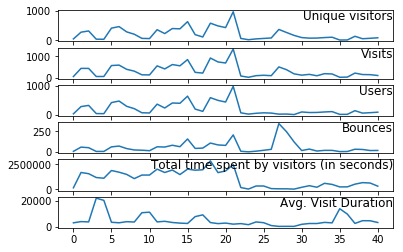

In [9]:
fig = plt.figure()

columns = ['Unique visitors', 'Visits', 'Users', 'Bounces', 'Total time spent by visitors (in seconds)','Avg. Visit Duration']

df = master_df[columns]
display(df.head())

i = 1 
for column in columns:
    ax = plt.subplot(len(columns), 1, i)
    plt.plot(df[column])
    plt.title(str(column), y=0.5, loc='right')
    i += 1 
plt.show()

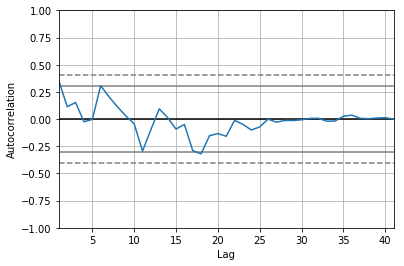

In [14]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Unique visitors'])
plt.show()

predicted=105.782391, expected=73.000000
predicted=77.531197, expected=90.000000
predicted=78.654295, expected=102.000000
predicted=87.590099, expected=6.000000
predicted=36.388155, expected=8.000000
predicted=34.179307, expected=134.000000
predicted=79.959903, expected=50.000000
predicted=36.113085, expected=65.000000
predicted=79.410186, expected=82.000000
Test MSE: 2326.771


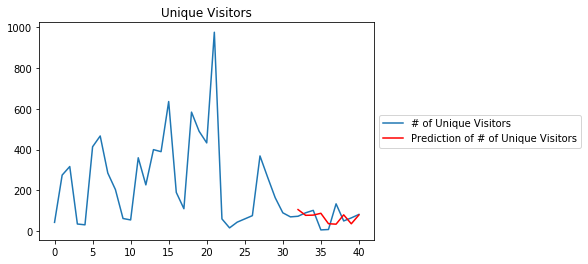

In [60]:
from statsmodels.tsa.arima_model import ARIMA

size = int(len(df) * 0.8)
train, test = df[0:size], df[size:len(X)]
history = [x for x in train['Unique visitors']]
predictions = list()
prediction_index = [] 
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Unique visitors'].iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test['Unique visitors'], predictions)

print('Test MSE: %.3f' % error)


plt.plot(df['Unique visitors'], label='# of Unique Visitors')
prediction_indexes = [i+len(train) for i in range(len(test))]
plt.plot(prediction_indexes, predictions, color='red', label="Prediction of # of Unique Visitors")
plt.title('Unique Visitors')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()